#(NLP PROJECT) Text Preprocessing and Exploratory NLP Analysis on Netflix Content Descriptions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import spacy
nlp = spacy.load('en_core_web_sm')
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from sklearn.model_selection import train_test_split

In [3]:
shows = pd.read_csv('/content/netflix_titles.csv')

In [4]:
shows

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [5]:
shows.shape

(8807, 12)

In [8]:
shows.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
shows.type.value_counts()

,count
type,
Movie,6131
TV Show,2676


In [10]:
type_counts = shows.type.value_counts()
labels = type_counts.index
sizes = type_counts.values

Text(0.5, 1.0, 'Distribution of Show Types')

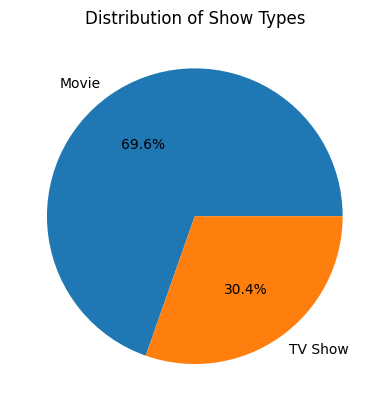

In [11]:
plt.pie(sizes, labels=labels, autopct= "%1.1f%%")
plt.title('Distribution of Show Types')

In [12]:
shows["country"].value_counts()

,count
country,
United States,2818
India,972
United Kingdom,419
Japan,245
South Korea,199
...,...
"Mexico, United States, Spain, Colombia",1
"Canada, Norway",1
"Finland, Germany, Belgium",1


Text(0.5, 1.0, 'Top 20 countries producing content on Netflix')

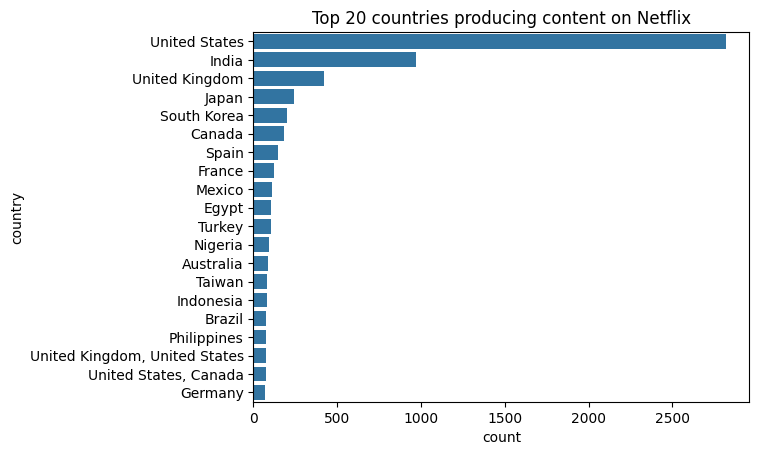

In [13]:
sns.countplot(y = 'country', order = shows['country'].value_counts().index[0:20],data = shows)
plt.title("Top 20 countries producing content on Netflix")

preparing the data

In [14]:
data = shows[['description','listed_in']]

In [15]:
data


,description,listed_in
0,"As her father nears the end of his life, filmm...",Documentaries
1,"After crossing paths at a party, a Cape Town t...","International TV Shows, TV Dramas, TV Mysteries"
2,To protect his family from a powerful drug lor...,"Crime TV Shows, International TV Shows, TV Act..."
3,"Feuds, flirtations and toilet talk go down amo...","Docuseries, Reality TV"
4,In a city of coaching centers known to train I...,"International TV Shows, Romantic TV Shows, TV ..."
...,...,...
8802,"A political cartoonist, a crime reporter and a...","Cult Movies, Dramas, Thrillers"
8803,"While living alone in a spooky town, a young g...","Kids' TV, Korean TV Shows, TV Comedies"
8804,Looking to survive in a world taken over by zo...,"Comedies, Horror Movies"
8805,"Dragged from civilian life, a former superhero...","Children & Family Movies, Comedies"


In [16]:
all_categories=",".join([cat for cat in data['listed_in']])
unique_categories_without_normalization=set(all_categories.split(","))
print("Number of Unique Categories ",len(unique_categories_without_normalization),
      unique_categories_without_normalization)

Number of Unique Categories  73 {'Docuseries', 'Classic Movies', 'TV Dramas', ' Classic Movies', ' TV Mysteries', ' Romantic TV Shows', 'Comedies', ' TV Dramas', ' Classic & Cult TV', ' Spanish-Language TV Shows', ' Faith & Spirituality', ' Sports Movies', 'TV Comedies', ' Crime TV Shows', 'TV Horror', 'British TV Shows', ' Stand-Up Comedy', 'Horror Movies', 'Crime TV Shows', ' Anime Features', ' Teen TV Shows', 'Stand-Up Comedy & Talk Shows', ' International Movies', 'Anime Features', 'Music & Musicals', ' Cult Movies', ' Music & Musicals', ' Documentaries', ' Reality TV', ' Dramas', 'Thrillers', 'Action & Adventure', ' Independent Movies', ' Romantic Movies', " Kids' TV", 'Reality TV', 'TV Action & Adventure', 'Movies', ' TV Sci-Fi & Fantasy', ' Thrillers', 'Sci-Fi & Fantasy', 'TV Shows', ' Children & Family Movies', ' Stand-Up Comedy & Talk Shows', 'Sports Movies', ' International TV Shows', 'Dramas', ' TV Comedies', 'Spanish-Language TV Shows', ' Comedies', ' TV Thrillers', ' Docus

In [17]:
all_categories = ",".join([cat for cat in data['listed_in']])
normalized_categories = [cat.strip().lower() for cat in all_categories.split(",")]
unique_categories = set(normalized_categories)
print("Number of Unique Categories:", len(unique_categories),unique_categories)

Number of Unique Categories: 42 {'children & family movies', 'sci-fi & fantasy', 'tv mysteries', 'comedies', 'music & musicals', 'thrillers', 'international tv shows', 'tv comedies', 'crime tv shows', 'tv action & adventure', 'dramas', 'international movies', 'stand-up comedy & talk shows', 'classic movies', 'stand-up comedy', 'sports movies', 'cult movies', 'movies', 'tv sci-fi & fantasy', 'korean tv shows', 'lgbtq movies', 'british tv shows', 'anime features', 'spanish-language tv shows', 'anime series', 'horror movies', 'tv horror', "kids' tv", 'teen tv shows', 'tv dramas', 'documentaries', 'reality tv', 'independent movies', 'romantic tv shows', 'tv thrillers', 'science & nature tv', 'classic & cult tv', 'faith & spirituality', 'action & adventure', 'docuseries', 'romantic movies', 'tv shows'}


In [18]:
data['listed_in'] = data['listed_in'].apply(lambda x: [cat.strip().lower() for cat in x.split(",")])

/tmp/ipython-input-2005376451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['listed_in'] = data['listed_in'].apply(lambda x: [cat.strip().lower() for cat in x.split(",")])


In [19]:
data.head()

,description,listed_in
0,"As her father nears the end of his life, filmm...",[documentaries]
1,"After crossing paths at a party, a Cape Town t...","[international tv shows, tv dramas, tv mysteries]"
2,To protect his family from a powerful drug lor...,"[crime tv shows, international tv shows, tv ac..."
3,"Feuds, flirtations and toilet talk go down amo...","[docuseries, reality tv]"
4,In a city of coaching centers known to train I...,"[international tv shows, romantic tv shows, tv..."


In [20]:
pd.set_option('display.max_columns', 45)

In [21]:
def isCategory(categories, category):
    if category in categories:
        return 1
    else:
        return 0

for cat in unique_categories:
    data[cat] = data['listed_in'].apply(lambda x: isCategory(x, cat))

/tmp/ipython-input-4095599652.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cat] = data['listed_in'].apply(lambda x: isCategory(x, cat))
/tmp/ipython-input-4095599652.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[cat] = data['listed_in'].apply(lambda x: isCategory(x, cat))
/tmp/ipython-input-4095599652.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [22]:
data.head(20)

,description,listed_in,children & family movies,sci-fi & fantasy,tv mysteries,comedies,music & musicals,thrillers,international tv shows,tv comedies,crime tv shows,tv action & adventure,dramas,international movies,stand-up comedy & talk shows,classic movies,stand-up comedy,sports movies,cult movies,movies,tv sci-fi & fantasy,korean tv shows,lgbtq movies,british tv shows,anime features,spanish-language tv shows,anime series,horror movies,tv horror,kids' tv,teen tv shows,tv dramas,documentaries,reality tv,independent movies,romantic tv shows,tv thrillers,science & nature tv,classic & cult tv,faith & spirituality,action & adventure,docuseries,romantic movies,tv shows
0,"As her father nears the end of his life, filmm...",[documentaries],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,"After crossing paths at a party, a Cape Town t...","[international tv shows, tv dramas, tv mysteries]",0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,To protect his family from a powerful drug lor...,"[crime tv shows, international tv shows, tv ac...",0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,"Feuds, flirtations and toilet talk go down amo...","[docuseries, reality tv]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,In a city of coaching centers known to train I...,"[international tv shows, romantic tv shows, tv...",0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
5,The arrival of a charismatic young priest brin...,"[tv dramas, tv horror, tv mysteries]",0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
6,Equestria's divided. But a bright-eyed hero be...,[children & family movies],1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,"On a photo shoot in Ghana, an American model s...","[dramas, independent movies, international mov...",0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
8,A talented batch of amateur bakers face off in...,"[british tv shows, reality tv]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9,A woman adjusting to life after a loss contend...,"[comedies, dramas]",0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
data = data.drop('listed_in', axis=1)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   description                   8807 non-null   object
 1   children & family movies      8807 non-null   int64 
 2   sci-fi & fantasy              8807 non-null   int64 
 3   tv mysteries                  8807 non-null   int64 
 4   comedies                      8807 non-null   int64 
 5   music & musicals              8807 non-null   int64 
 6   thrillers                     8807 non-null   int64 
 7   international tv shows        8807 non-null   int64 
 8   tv comedies                   8807 non-null   int64 
 9   crime tv shows                8807 non-null   int64 
 10  tv action & adventure         8807 non-null   int64 
 11  dramas                        8807 non-null   int64 
 12  international movies          8807 non-null   int64 
 13  stand-up comedy & 

In [25]:
punctuations = string.punctuation
stopwords = list(STOP_WORDS)

def process_description(text):
    doc = nlp(text)

    processed_text = " ".join([token.lemma_.lower().strip() for token in doc
                               if token.text not in punctuations and token.text.lower() not in stopwords])
    return processed_text

In [26]:
data['description'] = data['description'].apply(process_description)

In [27]:
data.head()

,description,children & family movies,sci-fi & fantasy,tv mysteries,comedies,music & musicals,thrillers,international tv shows,tv comedies,crime tv shows,tv action & adventure,dramas,international movies,stand-up comedy & talk shows,classic movies,stand-up comedy,sports movies,cult movies,movies,tv sci-fi & fantasy,korean tv shows,lgbtq movies,british tv shows,anime features,spanish-language tv shows,anime series,horror movies,tv horror,kids' tv,teen tv shows,tv dramas,documentaries,reality tv,independent movies,romantic tv shows,tv thrillers,science & nature tv,classic & cult tv,faith & spirituality,action & adventure,docuseries,romantic movies,tv shows
0,father near end life filmmaker kirsten johnson...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,cross path party cape town teen set prove priv...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,protect family powerful drug lord skilled thie...,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,feuds flirtation toilet talk incarcerated woma...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
4,city coaching center know train india fine col...,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [28]:
x = data['description']
y = data.drop(columns=['description'])
X_train, X_val, y_train, y_val = train_test_split(x,y,train_size=0.75,random_state=21)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
# using the TfidfVectorizer to transform our x because the model doesn't work on text data
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_val)
print(X_train_tfidf)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 90858 stored elements and shape (6605, 13485)>
  Coords	Values
  (0, 3643)	0.41680667765419305
  (0, 10997)	0.2567018863365934
  (0, 8019)	0.2167300227937763
  (0, 9306)	0.32158922188293676
  (0, 8289)	0.16148443056533707
  (0, 7222)	0.16993710596520864
  (0, 4078)	0.27963234524703057
  (0, 7064)	0.14138321559642142
  (0, 4576)	0.16062530748216128
  (0, 13065)	0.21205070808354903
  (0, 3227)	0.31881322547680924
  (0, 11171)	0.24846917471752838
  (0, 11486)	0.3479350983702675
  (0, 11729)	0.31881322547680924
  (1, 8289)	0.1287422068408329
  (1, 12080)	0.2988460896694038
  (1, 13350)	0.142723590026278
  (1, 6920)	0.2288675733420295
  (1, 878)	0.2773885522260721
  (1, 13193)	0.2773885522260721
  (1, 3273)	0.20937054215030523
  (1, 5879)	0.23343673590870306
  (1, 8826)	0.3322958833823007
  (1, 4243)	0.3174941138650486
  (1, 1222)	0.17444058668723914
  :	:
  (6603, 4209)	0.20848203760558393
  (6603, 9796)	0.2191230929771334
  (66

Building the Model

In [31]:
from sklearn.pipeline import Pipeline
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import GradientBoostingClassifier

classifier =GradientBoostingClassifier(random_state=21)

pipeline = Pipeline([
    ('clf', MultiOutputClassifier(classifier))
])

pipeline.fit(X_train_tfidf, y_train)

predictions = pipeline.predict(X_test_tfidf)

In [36]:
predictions

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

# Measuring our model accuracy

In [38]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, predictions)

print("Accuracy:", accuracy*100)

Accuracy: 5.358764759309718
